# Import Libraries

In [2]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import time
from keras.initializers import RandomNormal
from tensorflow.keras.regularizers import l1, l2

# Data preprocessing

In [8]:
# load the datasheet
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# transform the y data to categorical
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# x data normalisation
normalisation = False
if normalisation:
    x_train = x_train / np.max(x_train)
    x_test = x_test / np.max(x_test)

length_training = int(0.8 * len(x_train))
length_validation = int(0.2 * len(x_train))

x_train, x_validation = tf.split(x_train, [length_training, length_validation], 0)
y_train, y_validation = tf.split(y_train, [length_training, length_validation], 0)



11501568/11490434 [==============================] - 0s 0us/step


# General Hyperparameters

In [9]:
epochs = 100
input_shape = [28, 28]
neurons_first_layer = 128
neurons_second_layer = 256
neurons_output = 10

# Baseline Model

2022-08-06 15:38:42.034587: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Time passed -> 83.23423099517822


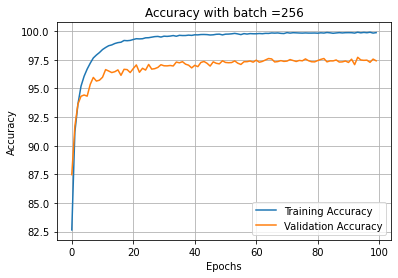

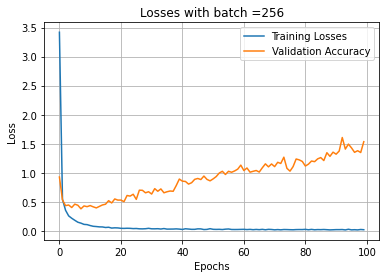

Time passed -> 10.805509805679321


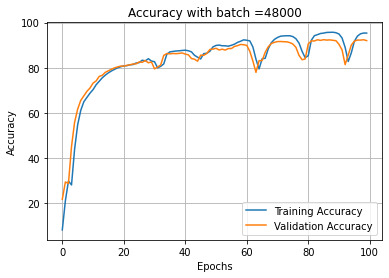

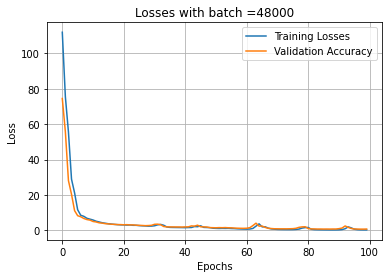

In [4]:
# hyperparameters
batch_sizes = [256, length_training] #[1, 256, length_training]

# model setting
for batch_size in batch_sizes:
    start = time.time()
    model_baseline = Sequential()
    model_baseline.add(Flatten(input_shape=input_shape))
    model_baseline.add(Dense(neurons_first_layer, activation='relu'))
    model_baseline.add(Dense(neurons_second_layer, activation='relu'))
    model_baseline.add(Dense(neurons_output, activation='softmax'))
    model_baseline.compile(loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])
    fit_model = model_baseline.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation),verbose=0)
    
    print(f'Time passed -> ' +str(time.time() - start))

    train_accuracy = [fit_model.history['categorical_accuracy'][i] * 100 for i in range(100)]
    validation_accuracy = [fit_model.history['val_categorical_accuracy'][i] * 100 for i in range(100)]

    plt.plot(train_accuracy)
    plt.plot(validation_accuracy)

    plt.title(f'Accuracy with batch =' + str(batch_size))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
    plt.grid()
    plt.show()
    
    train_loss = fit_model.history['loss']
    validation_loss = fit_model.history['val_loss']
    
    plt.plot(train_loss)
    plt.plot(validation_loss)

    plt.title(f'Losses with batch =' + str(batch_size))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Losses', 'Validation Accuracy'], loc='upper right')
    plt.grid()
    plt.show()

# RMSProp

Time passed -> 69.93087768554688


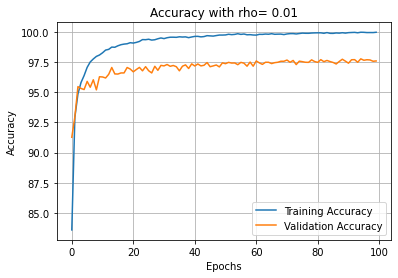

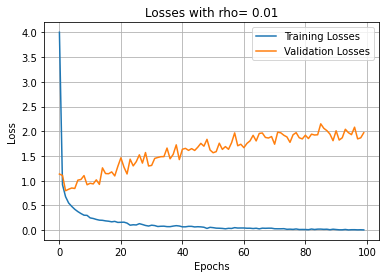

Time passed -> 70.42246603965759


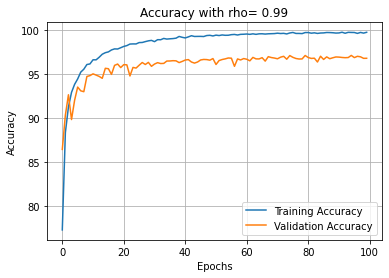

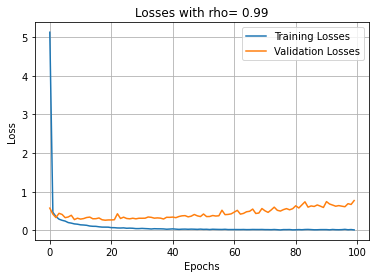

In [5]:
# hyperparameters
batch_size = 256
rho = [0.01, 0.99]
learning_rate = 0.001

# model setting
for r in rho:
    start = time.time()
    model_rms = Sequential()
    model_rms.add(Flatten(input_shape=input_shape))
    model_rms.add(Dense(neurons_first_layer, activation='relu'))
    model_rms.add(Dense(neurons_second_layer, activation='relu'))
    model_rms.add(Dense(neurons_output, activation='softmax'))
    model_rms.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=r),
                   loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=[tf.keras.metrics.CategoricalAccuracy()])
    fit_model_rms = model_rms.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation),verbose=0)
    
    print(f'Time passed -> ' +str(time.time() - start))
    
    train_accuracy = [fit_model_rms.history['categorical_accuracy'][i] * 100 for i in range(100)]
    validation_accuracy = [fit_model_rms.history['val_categorical_accuracy'][i] * 100 for i in range(100)]

    plt.plot(train_accuracy)
    plt.plot(validation_accuracy)

    plt.title(f'Accuracy with rho= ' + str(r))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
    plt.grid()
    plt.show()
    
    train_loss = fit_model_rms.history['loss']
    validation_loss = fit_model_rms.history['val_loss']

    plt.plot(train_loss)
    plt.plot(validation_loss)

    plt.title(f'Losses with rho= ' + str(r))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Losses', 'Validation Losses'], loc='upper right')
    plt.grid()
    plt.show()


# Stochastic Gradient Descent

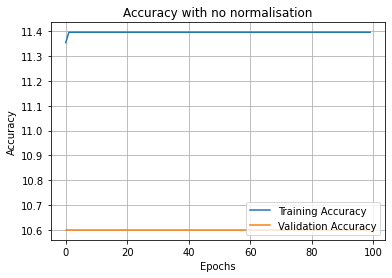

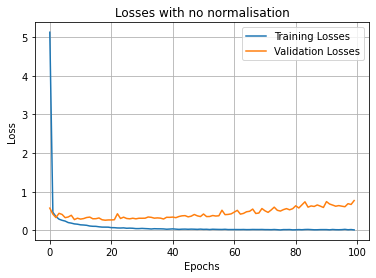

In [6]:
# hyperparameters
batch_size = 256
learning_rate = 0.01
mean_weight = 10

# model setting
model_sgd = Sequential()
model_sgd.add(Flatten(input_shape=input_shape))
model_sgd.add(Dense(neurons_first_layer, activation='relu', kernel_initializer=RandomNormal(mean=mean_weight)))
model_sgd.add(Dense(neurons_second_layer, activation='relu', kernel_initializer=RandomNormal(mean=mean_weight)))
model_sgd.add(Dense(neurons_output, activation='softmax', kernel_initializer=RandomNormal(mean=mean_weight)))
model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=[tf.keras.metrics.CategoricalAccuracy()])
fit_model_sgd = model_sgd.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation), verbose=0)

train_accuracy = [fit_model_sgd.history['categorical_accuracy'][i] * 100 for i in range(100)]
validation_accuracy = [fit_model_sgd.history['val_categorical_accuracy'][i] * 100 for i in range(100)]

plt.plot(train_accuracy)
plt.plot(validation_accuracy)

plt.title('Accuracy with no normalisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.grid()
plt.show()

train_loss = fit_model_sgd.history['loss']
validation_loss = fit_model_sgd.history['val_loss']

plt.plot(train_loss)
plt.plot(validation_loss)

plt.title('Losses with no normalisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Losses', 'Validation Losses'], loc='upper right')
plt.grid()
plt.show()



# SGD with L2 regularisation

2022-08-06 16:27:28.440159: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


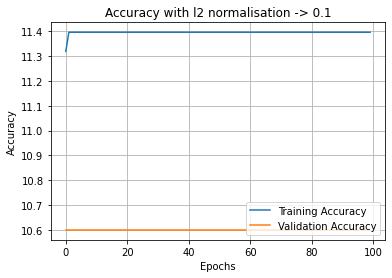

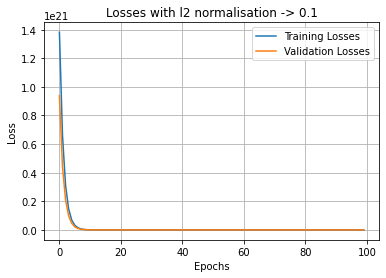

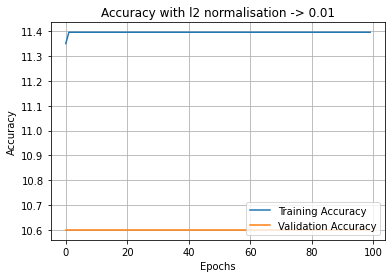

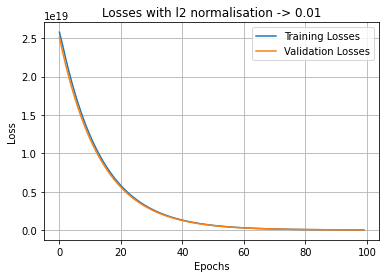

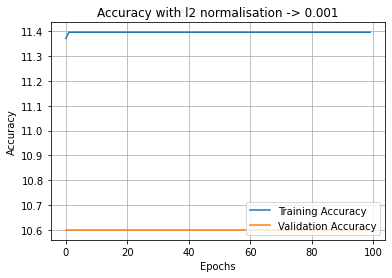

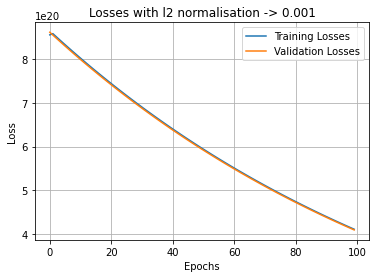

In [10]:
alpha = [0.1, 0.01, 0.001]
learning_rate = 0.01
mean_weight = 10
batch_size = 256

for a in alpha:
    model_l2 = Sequential()
    model_l2.add(Flatten(input_shape=input_shape))
    model_l2.add(Dense(neurons_first_layer, activation='relu', kernel_initializer=RandomNormal(mean=mean_weight), kernel_regularizer=l2(a)))
    model_l2.add(Dense(neurons_second_layer, activation='relu', kernel_initializer=RandomNormal(mean=mean_weight), kernel_regularizer=l2(a)))
    model_l2.add(Dense(neurons_output, activation='softmax', kernel_initializer=RandomNormal(mean=mean_weight), kernel_regularizer=l2(a)))
    model_l2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=[tf.keras.metrics.CategoricalAccuracy()])
    fit_model_l2 = model_l2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation), verbose=0)

    train_accuracy = [fit_model_l2.history['categorical_accuracy'][i] * 100 for i in range(100)]
    validation_accuracy = [fit_model_l2.history['val_categorical_accuracy'][i] * 100 for i in range(100)]

    plt.plot(train_accuracy)
    plt.plot(validation_accuracy)

    plt.title(f'Accuracy with l2 normalisation, alpha = ' + str(a))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
    plt.grid()
    plt.show()

    train_loss = fit_model_l2.history['loss']
    validation_loss = fit_model_l2.history['val_loss']

    plt.plot(train_loss)
    plt.plot(validation_loss)

    plt.title(f'Losses with l2 normalisation, alpha = ' + str(a))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Losses', 'Validation Losses'], loc='upper right')
    plt.grid()
    plt.show()


# SGD with L1 regularisation

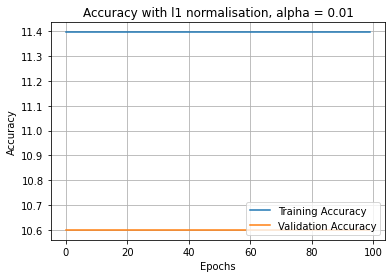

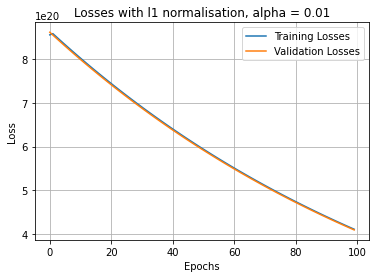

In [11]:
alpha = 0.01
dropout_prob = 0.3
learning_rate = 0.01
mean_weight = 10
batch_size = 256

model_l1 = Sequential()
model_l1.add(Flatten(input_shape=input_shape))
model_l1.add(Dense(neurons_first_layer, activation='relu', kernel_initializer=RandomNormal(mean=mean_weight),kernel_regularizer=l1(alpha)))
model_l1.add(Dropout(dropout_prob))
model_l1.add(Dense(neurons_second_layer, activation='relu', kernel_initializer=RandomNormal(mean=mean_weight),kernel_regularizer=l1(alpha)))
model_l1.add(Dropout(dropout_prob))
model_l1.add(Dense(neurons_output, activation='softmax', kernel_initializer=RandomNormal(mean=mean_weight), kernel_regularizer=l1(alpha)))
model_l1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])
fit_model_l1 = model_l2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation), verbose=0)

train_accuracy = [fit_model_l1.history['categorical_accuracy'][i] * 100 for i in range(100)]
validation_accuracy = [fit_model_l1.history['val_categorical_accuracy'][i] * 100 for i in range(100)]

plt.plot(train_accuracy)
plt.plot(validation_accuracy)

plt.title(f'Accuracy with l1 normalisation, alpha = ' + str(alpha))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.grid()
plt.show()

train_loss = fit_model_l2.history['loss']
validation_loss = fit_model_l2.history['val_loss']

plt.plot(train_loss)
plt.plot(validation_loss)

plt.title(f'Losses with l1 normalisation, alpha = ' + str(alpha))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Losses', 'Validation Losses'], loc='upper right')
plt.grid()
plt.show()